In [2]:
import joblib
import pandas as pd

In [3]:
model = joblib.load('Best_Model_Test.pkl')
data = pd.read_excel("dataset_SIH_2024.xlsx")
data['ALLSKY_SFC_LW_DWN'] /= 10
data['ALLSKY_SFC_PAR_TOT'] /= 10
data['CLRSKY_SFC_PAR_TOT'] /= 10
data['DATE'] = pd.to_datetime(data['DATE'], format="%d.%m.%Y")
data['Month'] = data['DATE'].dt.month
data['Day'] = data['DATE'].dt.day
data['DayOfYear'] = data['DATE'].dt.dayofyear
data['UD_lag_1'] = data['UD'].shift(1)
data['UD_lag_2'] = data['UD'].shift(2)
data = data.dropna()
print(data.head())

        DATE     UD  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DNI  ALLSKY_SFC_SW_DIFF  \
2 2022-01-03  4.521               3.21               3.10                1.67   
3 2022-01-04  4.490               2.82               1.83                1.88   
4 2022-01-05  4.318               0.81               0.35                0.64   
5 2022-01-06  4.319               2.27               1.26                1.60   
6 2022-01-07  4.659               1.46               0.59                1.16   

   ALLSKY_KT  ALLSKY_SFC_LW_DWN  ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_PAR_TOT  \
2       0.55             30.124               5.459               5.596   
3       0.48             33.200               5.012               5.900   
4       0.14             35.990               1.610               5.331   
5       0.38             36.310               3.983               4.911   
6       0.25             37.340               2.618               4.762   

   ALLSKY_SFC_UVA  ...   RH2M     PS  WS10M_MAX  WS10M_MIN  HO

In [4]:
df = data[(data['DATE'] >= pd.Timestamp(day=1, month=1, year=2024)) &  
          (data['DATE'] <= pd.Timestamp(day=31, month=1, year=2024))]
print(df)

          DATE     UD  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DNI  \
730 2024-01-01  5.134               1.93               1.49   
731 2024-01-02  4.910               2.14               1.21   
732 2024-01-03  5.257               0.93               0.39   
733 2024-01-04  5.241               0.62               0.29   
734 2024-01-05  5.538               0.63               0.32   
735 2024-01-06  5.137               1.26               0.53   
736 2024-01-07  5.106               1.52               0.72   
737 2024-01-08  5.337               1.27               0.68   
738 2024-01-09  5.435               1.33               0.58   
739 2024-01-10  5.269               2.83               2.33   
740 2024-01-11  5.054               3.27               3.02   
741 2024-01-12  5.259               3.26               3.29   
742 2024-01-13  5.537               2.25               0.95   
743 2024-01-14  4.888               2.75               2.41   
744 2024-01-15  4.969               3.12               

In [5]:
features = [i for i in data.columns if i != 'UD' and i != 'DATE']
target = ['UD']
x_test = df[features]
y_test = df[target].values.ravel()

In [6]:
print(y_test)

[5.134 4.91  5.257 5.241 5.538 5.137 5.106 5.337 5.435 5.269 5.054 5.259
 5.537 4.888 4.969 5.537 5.054 4.969 5.798 5.491 5.522 5.816 5.526 5.71
 5.537 4.888 4.969 5.054 5.259 5.269 5.318]


In [7]:
y_pred = model.predict(x_test)

In [8]:
print(y_pred)

[4.76382303 5.10765464 4.93344842 5.29025423 5.15003698 4.94920818
 4.70041908 4.89898008 5.23900449 5.39040733 5.47645827 4.94285839
 5.27483839 5.2632412  4.96342046 5.16797654 5.5820567  5.04432875
 5.08471646 5.25045616 5.32256394 5.56468321 5.57234677 5.51264847
 5.55733403 5.33265449 4.81931896 4.70919644 4.9101592  5.43375144
 5.46461218]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15016\2570107816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])


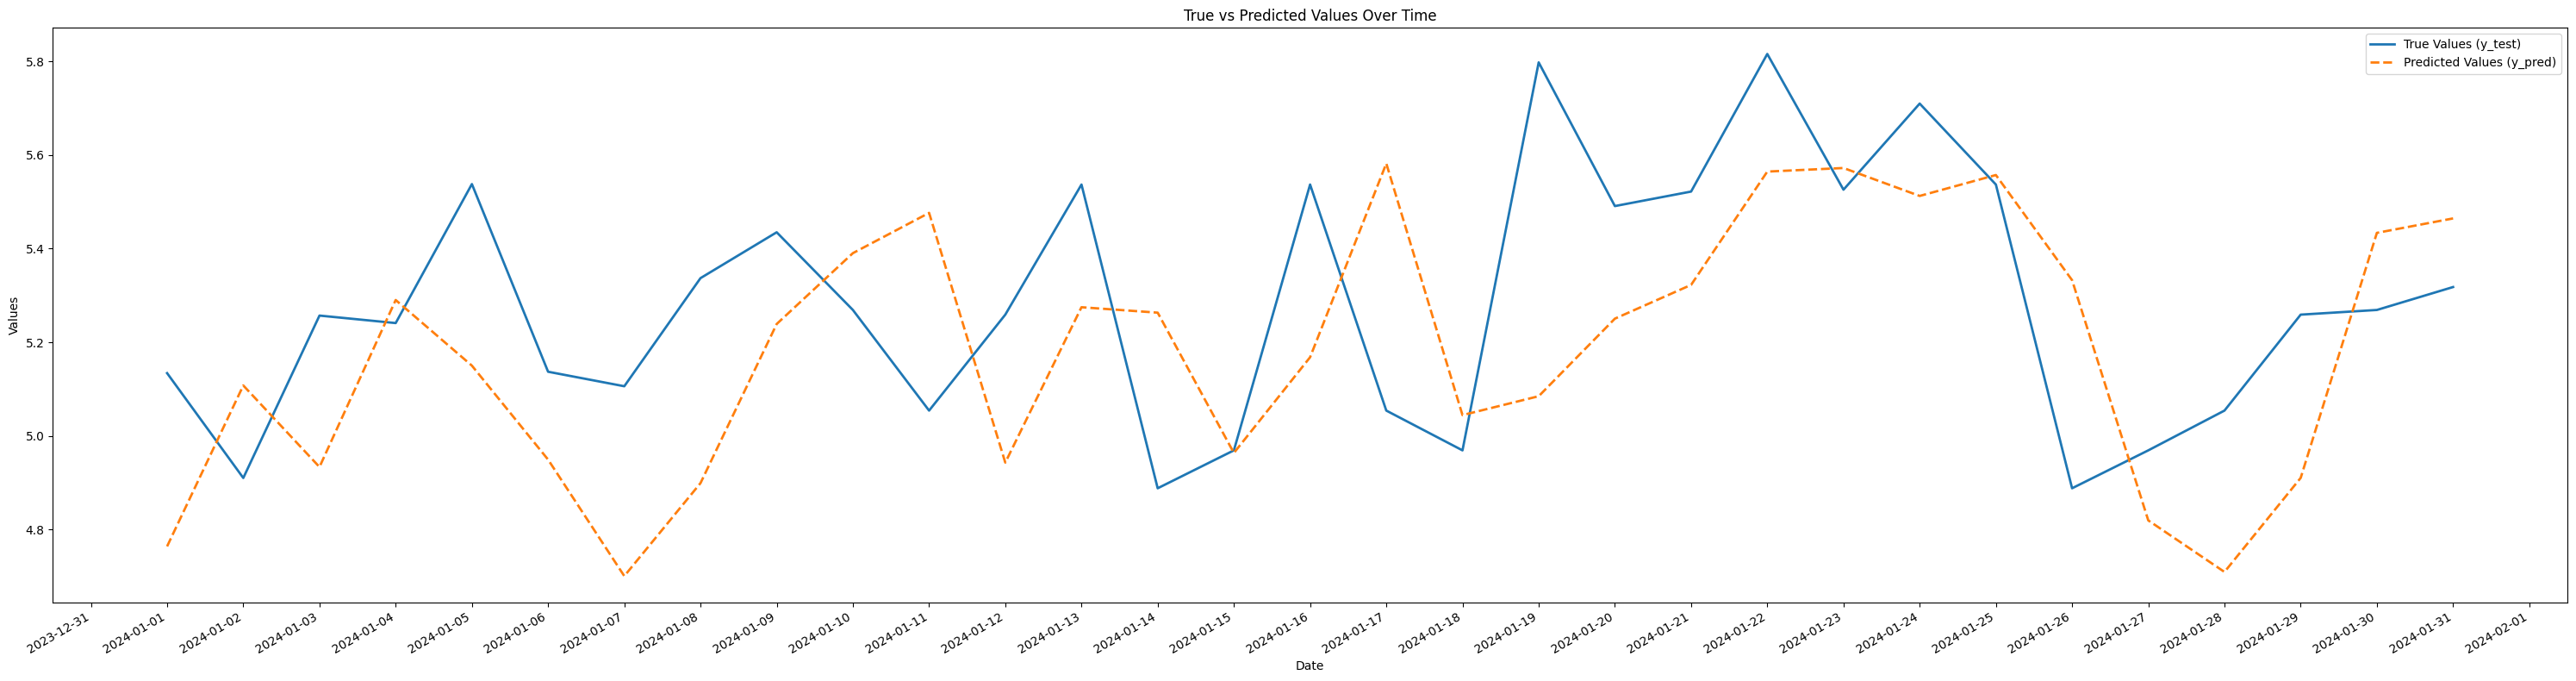

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert DATE to datetime if it's not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Create the figure with a larger size
plt.figure(figsize=(30, 8))

# Plot y_test and y_pred
plt.plot(df['DATE'], y_test, label='True Values (y_test)', color='tab:blue', linewidth=2)
plt.plot(df['DATE'], y_pred, label='Predicted Values (y_pred)', color='tab:orange', linestyle='--', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('True vs Predicted Values Over Time')
plt.legend()

# Rotate date labels for better visibility
plt.xticks(rotation=45)

# Set the x-axis to show every day
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Ensure all dates are displayed properly
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()
